# Ejercicio 4
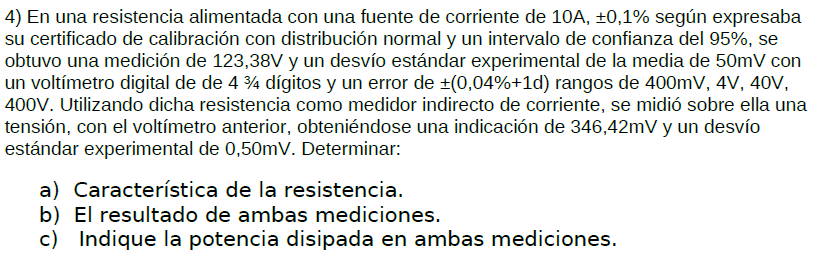

# Ítem A y B parte 1
## Se trata de una medición indirecta \begin{equation} R = \frac{V}{I}\end{equation}
## Por esta razón las derivadas parciales en el cálculo de la incertidumbre combinada ya no son unitarias. Por otro lado no hay correlación entre las magnitudes dado que la corriente se provee con un generador, es independiente de la tensión medida.

In [1]:
import numpy as np

#Incertidumbre de la corriente, es solo tipo B
I_uj = 10*0.001 / 2 #se debe dividir por dos dado que nos informan que es una incertidumbre expandida al 95% de confianza

print("Incertidumbre (solo tipo B) de la corriente: %f" %I_uj)

Incertidumbre (solo tipo B) de la corriente: 0.005000


In [2]:
#Incertidumbre de la tension

#Tipo A
V_ui = 0.05

#Tipo B
#La precision del voltímetro permite que muestre en pantalla los 123.38V
#En el rango de adecuado, de 400V, el error de un dígito equivale a un error de 0.01V
Error_absoluto = 123.38 * 0.04/100 + 0.01

#Supongo distribución uniforme
V_uj = Error_absoluto / np.sqrt(3)

V_u = np.sqrt(V_ui**2 + V_uj**2)

print("Incertidumbre tipo A: %fV" %V_ui)
print("Error absoluto de : %fV" %Error_absoluto)
print("Incertidumbre tipo B: %fV" %V_uj)
print("Incertidumbre total: %fV" %V_u)

Incertidumbre tipo A: 0.050000V
Error absoluto de : 0.059352V
Incertidumbre tipo B: 0.034267V
Incertidumbre total: 0.060615V


In [3]:
#Incertidumbre combinada de la Resistencia
I = 10
V = 123.38
R = V / I

dR_dV = 1 / I
dR_dI = -V / I**2

R_uc = np.sqrt( (dR_dV * V_u)**2 + (dR_dI * I_uj)**2 )

#Suponiendo la distribución de R_uc como normal, expandimos al 95,45% de confianza con K = 2
R_uc_expandido = R_uc * 2

print("Valor de resistencia medido: %f ohms" %R)
print("Incertidumbre combinada expandida de la resistencia: %f ohms" %R_uc_expandido)

Valor de resistencia medido: 12.338000 ohms
Incertidumbre combinada expandida de la resistencia: 0.017297 ohms


## El valor nominal de mercado más cercano es el de 12 $\Omega$, la tolerancia de mercado debe ser del 5% ya que el intervalo de 11.4 $\Omega$ a 12.6 $\Omega$ es el mínimo que contiene a la medición tomada con su incertidumbre incluída.

# Ítem B parte 2
## Se trata de otra medición indirecta: $$ I = \frac{V}{R}$$

In [4]:
#Incertidumbre de la tensión
#Tipo A
V2_ui = 0.5e-3

#Tipo B
#La precision del voltímetro permite que muestre en pantalla los 346.42mV
#En el rango de adecuado, de 400mV, el error de un dígito equivale a un error de 0.01mV

V2 = 346.42e-3
Error_absoluto2 = V2 * 0.04/100 + 0.01e-3

#Supongo distribución uniforme
V2_uj = Error_absoluto2 / np.sqrt(3)

V2_u = np.sqrt(V2_ui**2 + V2_uj**2)

print("Incertidumbre tipo A:", V2_ui)
print("Error absoluto de", Error_absoluto2)
print("Incertidumbre tipo B:", V2_uj)
print("Incertidumbre total:", V2_u)

Incertidumbre tipo A: 0.0005
Error absoluto de 0.00014856800000000002
Incertidumbre tipo B: 8.577577479296434e-05
Incertidumbre total: 0.0005073041331798247


In [5]:
#Incertidumbre combinada de la Corriente
I2 = V2 / R

dI_dV = 1 / R
dI_dR = -V2 / R**2

#Nosotros pensamos que para el cálculo de incertidumbre se debería tener en cuenta la correlación
#entre la tensión y la corriente, pero sin los valores de las muestras, no se puede calcular.
I2_uc = np.sqrt( (dI_dV * V2_u)**2 + (dI_dR * R_uc)**2 )

#Suponiendo la distribución de I_uc como normal, expandimos al 95,45% de confianza con K = 2
I2_uc_expandido = I2_uc * 2

print("Valor de corriente medido:", I2, "A")
print("Incertidumbre combinada expandida de la corriente:", I2_uc_expandido, "A")

Valor de corriente medido: 0.028077484195169398 A
Incertidumbre combinada expandida de la corriente: 9.116996684611687e-05 A


# Ítem C
## Medición indirecta de potencia en ambas mediciones
## $$P_1=V I$$

## $$P_2 = \frac{V^2}{R}$$

In [6]:
#Incertidumbre combinada de la Potencia en el primer caso
P1 = V * I
dP1_dV = I
dP1_dI = V

P1_uc = np.sqrt( (dP1_dV * V_u)**2 + (dP1_dI * I_uj)**2)

#Suponiendo la distribución de I_uc como normal, expandimos al 95,45% de confianza con K = 2
P1_uc_expandido = P1_uc * 2

print("Valor de potencia 1 medida:", P1, "W")
print("Incertidumbre combinada de la potencia:", P1_uc_expandido, "W")

Valor de potencia 1 medida: 1233.8 W
Incertidumbre combinada de la potencia: 1.7297255352222793 W


In [7]:
#Incertidumbre combinada de la Potencia en el segundo caso
P2 = V2**2 / R
dP2_dV = 2*V2/R
dP2_dR = -V2**2 / R**2

P2_uc = np.sqrt( (dP2_dV * V2_u)**2 + (dP2_dR * R_uc)**2)

#Suponiendo la distribución de I_uc como normal, expandimos al 95,45% de confianza con K = 2
P2_uc_expandido = P2_uc * 2

print("Valor de potencia 2 medida:", P2, "W")
print("Incertidumbre combinada de la potencia:", P2_uc_expandido, "W")

Valor de potencia 2 medida: 0.009726602074890582 W
Incertidumbre combinada de la potencia: 5.858438692391999e-05 W
